# ZOO DATASET
Using the above dataset to build a K Nearest Neighbors Model to predict the type of animal.

## BUSINESS OBJECTIVE
* Maximize Accurate prediction
* Minimize Errors

## CONSTRAINTS
* Incorrect Entry


## DATA DICTIONARY

| **slno** | **Name of Feature** | **Description**                                         | **Type** | **Relevance** |
|:--------:|:--------------------|:--------------------------------------------------------|:--------:|:-------------:|
| 1        | animal name         | Animal names                                            | Nominal  | Irrelevant    |
| 2        | hair                | Hair or No Hair                                         | Binary   | Relevant      |
| 3        | feathers            | Feathers or No Feathers                                 | Binary   | Relevant      |
| 4        | eggs                | Lays eggs or no eggs                                    | Binary   | Relevant      |
| 5        | milk                | Gives Milk or no Milk                                   | Binary   | Relevant      |
| 6        | airborne            | Airborne or Not Airborne                                | Binary   | Relevant      |
| 7        | aquatic             | Aquatic or not aquatic                                  | Binary   | Relevant      |
| 8        | predator            | Is a predator or not                                    | Binary   | Relevant      |
| 9        | toothed             | Has teeth or no teeth                                   | Binary   | Relevant      |
| 10       | backbone            | backbone or no backbone                                 | Binary   | Relevant      |
| 11       | breathes            | Breathes or doesn't breathe                             | Binary   | Relevant      |
| 12       | venomous            | Venomous or non venomous                                | Binary   | Relevant      |
| 13       | fins                | Has fins or no fins                                     | Binary   | Relevant      |
| 14       | legs                | Has legs or no legs                                     | Ratio    | Relevant      |
| 15       | tail                | Has tail or no tail                                     | Binary   | Relevant      |
| 16       | domestic            | Is domesticated or not domesticated                     | Binary   | Relevant      |
| 17       | catsize             | Category Size                                           | Binary   | Relevant      |
| 18       | type                | Dependent Variable: Type of Animal of the seven 7 types | Nominal  | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:

df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass15\Zoo.csv")
df=df0.copy()
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(101, 18)

In [4]:
df.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number and Percentage of Missing Values in the Dataset.

In [8]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 animal name    0
hair           0
catsize        0
domestic       0
tail           0
legs           0
fins           0
venomous       0
breathes       0
backbone       0
toothed        0
predator       0
aquatic        0
airborne       0
milk           0
eggs           0
feathers       0
type           0
dtype: int64


In [9]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 animal name    100
hair             2
feathers         2
eggs             2
milk             2
airborne         2
aquatic          2
predator         2
toothed          2
backbone         2
breathes         2
venomous         2
fins             2
legs             6
tail             2
domestic         2
catsize          2
type             7
dtype: int64


In [11]:
df['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [12]:
df.mean()

C:\Users\lenny\AppData\Local\Temp\ipykernel_1688\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


hair        0.425743
feathers    0.198020
eggs        0.584158
milk        0.405941
airborne    0.237624
aquatic     0.356436
predator    0.554455
toothed     0.603960
backbone    0.821782
breathes    0.792079
venomous    0.079208
fins        0.168317
legs        2.841584
tail        0.742574
domestic    0.128713
catsize     0.435644
type        2.831683
dtype: float64

In [13]:
df.median()

C:\Users\lenny\AppData\Local\Temp\ipykernel_1688\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


hair        0.0
feathers    0.0
eggs        1.0
milk        0.0
airborne    0.0
aquatic     0.0
predator    1.0
toothed     1.0
backbone    1.0
breathes    1.0
venomous    0.0
fins        0.0
legs        4.0
tail        1.0
domestic    0.0
catsize     0.0
type        2.0
dtype: float64

In [14]:
stats.mode(df)

C:\Users\lenny\AppData\Local\Temp\ipykernel_1688\4235401754.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(df)
C:\Users\lenny\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\lenny\AppData\Local\Temp\ipykernel_1688\4235401754.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/ref

ModeResult(mode=array([['frog', 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 0, 1]],
      dtype=object), count=array([[ 2, 58, 81, 59, 60, 77, 65, 56, 61, 83, 80, 93, 84, 38, 75, 88,
        57, 41]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [15]:
df.var()

C:\Users\lenny\AppData\Local\Temp\ipykernel_1688\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


hair        0.246931
feathers    0.160396
eggs        0.245347
milk        0.243564
airborne    0.182970
aquatic     0.231683
predator    0.249505
toothed     0.241584
backbone    0.147921
breathes    0.166337
venomous    0.073663
fins        0.141386
legs        4.134653
tail        0.193069
domestic    0.113267
catsize     0.248317
type        4.421386
dtype: float64

In [16]:
df.std()

C:\Users\lenny\AppData\Local\Temp\ipykernel_1688\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


hair        0.496921
feathers    0.400495
eggs        0.495325
milk        0.493522
airborne    0.427750
aquatic     0.481335
predator    0.499505
toothed     0.491512
backbone    0.384605
breathes    0.407844
venomous    0.271410
fins        0.376013
legs        2.033385
tail        0.439397
domestic    0.336552
catsize     0.498314
type        2.102709
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [18]:
df.skew()

C:\Users\lenny\AppData\Local\Temp\ipykernel_1688\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


hair        0.304908
feathers    1.538501
eggs       -0.346676
milk        0.388876
airborne    1.251556
aquatic     0.608577
predator   -0.222443
toothed    -0.431569
backbone   -1.707118
breathes   -1.461244
venomous    3.163428
fins        1.799849
legs        0.139427
tail       -1.126430
domestic    2.250991
catsize     0.263515
type        0.852362
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [19]:
df.kurt()

C:\Users\lenny\AppData\Local\Temp\ipykernel_1688\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


hair       -1.945969
feathers    0.373997
eggs       -1.918204
milk       -1.886536
airborne   -0.442773
aquatic    -1.662967
predator   -1.990336
toothed    -1.850801
backbone    0.932321
breathes    0.137564
venomous    8.168668
fins        1.264099
legs       -0.598630
tail       -0.746333
domestic    3.128527
catsize    -1.969973
type       -0.697422
dtype: float64

### GRAPHICAL REPRESENTATION

Plotting histograms of each variable.

C:\Users\lenny\AppData\Local\Temp\ipykernel_1688\522995607.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


<function matplotlib.pyplot.show(close=None, block=None)>

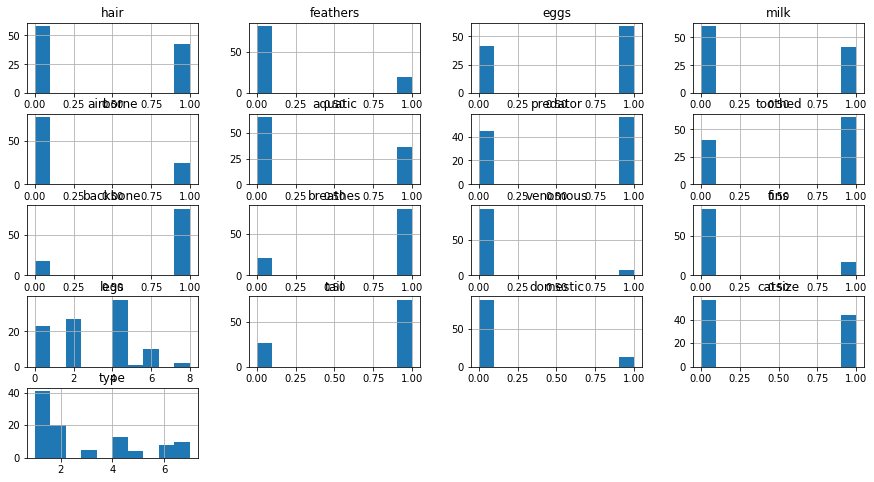

In [20]:
fig=plt.figure(figsize=(15,8))
ax=fig.gca()
df.hist(ax=ax)
plt.show

### MODEL BUILDING

Dropping the animal name column as it is irrelevant to the prediction.

In [24]:
df.drop(['animal name'],axis=1,inplace=True)

Splitting the data in to dependent and independent variable. 

In [25]:
X=df.drop(['type'],axis=1)
Y=df['type']

Splitting the X and Y data into train and test dataset using train_test_split function. 

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0,stratify=Y)

Assigning the column names to cols.

In [28]:
cols=X.columns

Scaling the train and test data of the independent variables. 

In [30]:
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [31]:
X_train=pd.DataFrame(X_train,columns=[cols])
X_train.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,-1.0,1.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0
2,1.0,0.0,-1.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0
4,1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,1.0


In [32]:
X_test=pd.DataFrame(X_test,columns=[cols])
X_test.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,-1.0,0.0,1.0,-2.0,0.0,1.0,0.0
2,1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0
3,1.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0


Checking the best nearest neighbors by considering all the values from 1 to 50 odd numbers on test and train accuracies and plotting the accuracies of both train and test data

In [34]:
acc = []

# running KNN algorithm for 1 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values

for i in range(1, 50, 2):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(X_train, Y_train)
    train_acc = np.mean(neigh.predict(X_train) == Y_train)
    test_acc = np.mean(neigh.predict(X_test) == Y_test)
    acc.append([train_acc, test_acc])

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\lenny\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[n

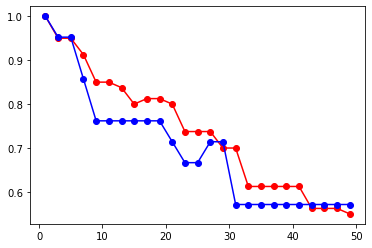

In [35]:
# train accuracy plot 
plt.plot(np.arange(1,50,2),[i[0] for i in acc],"ro-")

# test accuracy plot
plt.plot(np.arange(1,50,2),[i[1] for i in acc],"bo-")

Training the K-Nearest Neighbors Model on the train data. 

In [36]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KNeighborsClassifier(n_neighbors=1)

Evaluating the test data. 

In [37]:
pred=knn.predict(X_test)
pred

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\lenny\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([6, 4, 1, 1, 2, 7, 7, 1, 1, 2, 1, 1, 1, 1, 2, 3, 6, 4, 5, 2, 4],
      dtype=int64)

Accuracy of test data

In [39]:
accuracy_score(Y_test,pred)

1.0

In [40]:
pd.crosstab(Y_test, pred, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,1,2,3,4,5,6,7
Actual,,,,,,,
1,8,0,0,0,0,0,0
2,0,4,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,3,0,0,0
5,0,0,0,0,1,0,0
6,0,0,0,0,0,2,0
7,0,0,0,0,0,0,2


Evaluating the train data

In [41]:
pred_train=knn.predict(X_train)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\lenny\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy of the train data. 

In [42]:
accuracy_score(Y_train,pred_train)

1.0

In [43]:
pd.crosstab(Y_train,pred_train, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,1,2,3,4,5,6,7
Actual,,,,,,,
1,33,0,0,0,0,0,0
2,0,16,0,0,0,0,0
3,0,0,4,0,0,0,0
4,0,0,0,10,0,0,0
5,0,0,0,0,3,0,0
6,0,0,0,0,0,6,0
7,0,0,0,0,0,0,8


### CONCLUSION

This model is good as it is giving good accuracy and this will help in segregating into different categories based on their features. 